<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***K - Nearest Neighbor ($KNN$).***

We need to know some little things about $K$ - Nearest Neighbor:

$ \ $

$(1)$ In this lab, you will learn about and practice the $K$ - Nearest Neighbor ($KNN$) model. $KNN$ is a straightforward but very effective model that can be used for both classification and regression tasks.

$ \ $

$(2)$  If the feature space is not very large, $KNN$ can be a high-interpretable model because you can explain and understand how a prediction is made by looking at its nearest neighbors.



$ \ $

-----

## ***Note (data set).***

We will be using a tumor sample dataset containing lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task.

$ \ $

----

## ***Objectives***

After completing this lab, you will be able to:

* Train $KNN$ models with different neighbor hyper-parameters.

* Evaluate $KNN$ models on classification tasks.

* Tune the number of neighbors and find the optimized one for a specific task.







$ \ $

----

## ***Question $(1)$***

$ \ $

$(1)$ Let's install seaborn for visualization tasks and import required libraries for this lab.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

$ \ $

$(2)$ Ignore any deprecation warnings.

In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 

$ \ $

---

## ***Load and explore the tumor sample dataset***

$ \ $

$(1)$ We first load the dataset `tumor.csv` as a Pandas dataframe.



In [3]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
tumor_df = pd.read_csv(dataset_url)

$ \ $

$(2)$ Let's quickly take a look at the head of the dataframe.

In [4]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


$ \ $

$(3)$ Display its columns.

In [5]:
tumor_df.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

$ \ $

----

## ***What do we want to do?***




Each observation in this dataset contains lab test results about a tumor sample, such as clump or shapes. Based on these lab test results or features, we want to build a classification model to predict if this tumor sample is malicious (cancer) or benign. The target variable `y` is specified in the `Class` column.


$ \ $ 

----

## ***Question $(2)$***

$ \ $

$(1)$ Let's split the dataset into input `X` and output `y`.


In [6]:
# tomamos todas las columnas, excepto la ultima del datafram
X = tumor_df.iloc[:, :-1]

# tomamos la ultima columna del dataframe
y = tumor_df.iloc[:, -1:]

$ \ $

$(2)$ Check the statistics summary of features in X.

In [7]:
X.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


As we can see from the above cell output, all features are numeric and ranged between $1$ to $10$. This is very convenient as we do not need to scale the feature values as they are already in the same range.

$ \ $

$(3)$ Let's check the class distribution of output `y`.

In [8]:
y.value_counts(normalize = True)

Class
0        0.650073
1        0.349927
dtype: float64

<Axes: xlabel='Class'>

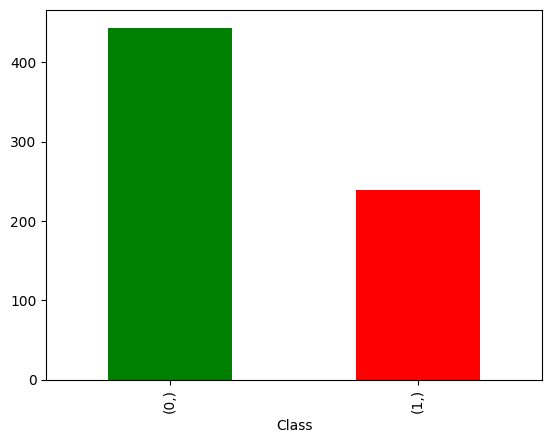

In [9]:
y.value_counts().plot.bar(color = ['green', 'red'])

We have about $65$% benign tumors (`Class = 0`) and $35$% cancerous tumors (`Class = 1`), which is not a very imbalanced class distribution. 


$ \ $

----

## ***Process and split training and testing datasets***

Split $80$% as training dataset and $20$% as testing dataset.




In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 123)

$ \ $

----

## ***Train and evaluate a KNN classifier with the number of neighbors set to 2***

$ \ $

Training a $KNN$ classifier is very similar to training other classifiers in `sklearn`, we first need to define a `KNeighborsClassifier` object. Here we use `n_neighbors = 2` argument to specify how many neighbors will be used for prediction, and we keep other arguments to be their default values.

$ \ $

$(1)$ Define a KNN classifier with `n_neighbors=2`.



In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 2)

$ \ $

$(2)$ Train the model with `X_train` and `y_train`, and  use ravel() method to convert the data frame `y_train` to a vector.


In [12]:
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [13]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

$ \ $

$(3)$ We make predictions on the `X_test` dataframe.


In [14]:
preds = knn_model.predict(X_test)

$ \ $

$(4)$ To evaluate the $KNN$ classifier, we provide a pre-defined method to return the commonly used evaluation metrics such as accuracy, recall, precision, f1score, and so on, based on the true classes in the 'y_test' and model predictions.


In [15]:
def evaluate_metrics(y_test, y_pred):

    # creamos un diccionario vacio
    results_pos = {}

    # agregamos el resultado de accuracy sobre la data y_test, y_pred al diccionario 
    results_pos['accuracy'] = accuracy_score(y_test, y_pred)

    # usamos la funcion precision_recall_fscore_support sobre la data y_test, y_pred para obtener precision, recall, f_beta
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, y_pred, average = 'binary')

    # agregamos al diccionario el resultado de recall
    results_pos['recall'] = recall

    # agregamos al diccionario el resultado de precision
    results_pos['precision'] = precision

    # agregamos al diccionario el resultado de f_beta
    results_pos['f1score'] = f_beta

    # la funcion devuelve el diccionario creado anteriormente
    return results_pos

$ \ $

$(5)$ We use the previous function on the data y_test, preds.

In [16]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9416058394160584,
 'recall': 0.875,
 'precision': 0.9545454545454546,
 'f1score': 0.9130434782608695}

We can see that there is a great classification performance on the tumor sample dataset. This means the $KNN$ model can effectively recognize cancerous tumors.


$ \ $

----

## ***Coding exercise: Train and evaluate a KNN classifier with number of neighbors set to 5***

$ \ $

$(1)$ Define a $KNN$ classifier with KNeighborsClassifier class.


In [17]:
model = KNeighborsClassifier(n_neighbors = 5)

$ \ $

$(2)$ Then train the model with `X_train` and `y_train`.


In [18]:
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

$ \ $

$(3)$ Make predictions on `X_test` dataframe.


In [19]:
pred = model.predict(X_test)

$ \ $

$(4)$ Evaluate your $KNN$ model with provided `evaluate_metrics()` method.


In [20]:
evaluate_metrics(y_test, pred)

{'accuracy': 0.9781021897810219,
 'recall': 0.9791666666666666,
 'precision': 0.9591836734693877,
 'f1score': 0.9690721649484536}

$ \ $

-----

## ***Tune the number of neighbors to find the optmized one***

$ \ $

OK, you may wonder which `n_neighbors` argument may give you the best classification performance. We can try different `n_neighbors` (the K value) and check which `K` gives the best classification performance.

$ \ $

$(1)$ Here we could try $K$ from $1$ to $50$, and store the aggregated `f1score` for each $k$ into a list.




In [21]:
# creamos una lista vacia, para luego decribir 
f1_scores = []

# realizamos una iteracion del 1 al 50
for k in range(1, 51):

    # Creamos un modelo clasificador KNN con n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors = k)

    # Entrenamos nuestro modelo con la data de entrenamiento
    knn = knn.fit(X_train, y_train.values.ravel())

    # Predecimos un conjunto de datos con la data de prueba y el modelo entrenado
    preds = knn.predict(X_test)

    # Evaluamos el clasificador con  f1score
    f1 = f1_score(y_test, preds)

    # Pegamos la tupla (k,f1) a la lista f1_scores
    tupla = (k, round(f1, 4))
    f1_scores.append(tupla)

In [22]:
# Creamos un dataframe con la lista de tuplas anterior
f1_results = pd.DataFrame(f1_scores, columns = ['K', 'F1 Score'])
f1_results =f1_results.set_index('K')
f1_results

,F1 Score
K,
1,0.9485
2,0.9130
3,0.9485
4,0.9583
5,0.9691
6,0.9583
7,0.9583
8,0.9474
9,0.9474


In [23]:
f1_results.sort_values(by = ['F1 Score'], ascending = False)

,F1 Score
K,
5,0.9691
26,0.9583
23,0.9583
16,0.9583
15,0.9583
19,0.9583
20,0.9583
21,0.9583
22,0.9583


As we can see from the F1 score linechart, the best `K` value is 5 with about `0.9691` f1score.


$ \ $

----

## ***Next steps***

Great! Now you have learned about and applied the $KNN$ model to solve a real-world tumor type classification problem. You also tuned the $KNN$ to find the best $K$ value. Later, you will continue learning other popular classification models with different structures, assumptions, cost functions, and application scenarios.

